<a href="https://colab.research.google.com/github/Nisha40108/ParkNaviGo/blob/main/Class_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
!pip install tensorflow==2.12

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import zipfile
import io
import os
import shutil
import pathlib
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from io import BytesIO
from zipfile import ZipFile

In [113]:
import shutil
import os

zip_file_path = '/content/sample_data/parking_data/Trial.zip'
extracted_folder_path = '/content/sample_data/parking_data'

# Unzip the file
shutil.unpack_archive(zip_file_path, extracted_folder_path, 'zip')

In [119]:
import os, shutil, pathlib

original_dir = pathlib.Path("/content/sample_data/Image/empty")
new_base_dir = pathlib.Path("/content/sample_data")

def make_subset(subset_name, start_index, end_index):
    for category in ("empty", "occupied"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok = True)
        fnames = [f"{category} {i}.png" for i in range(start_index + 1, min(end_index + 1,150))]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

# 70% for training
make_subset("train_data_2", start_index =0, end_index= 49)

# 15% for validation
make_subset("validation_data_2", start_index=50, end_index=74)

# 15% for testing
make_subset("test_data_2", start_index=75, end_index=100)

In [120]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train_data_2",
    image_size=(224, 224),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation_data_2",
    image_size=(224, 224),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test_data_2",
    image_size=(224, 224),
    batch_size=32)

Found 98 files belonging to 2 classes.
Found 48 files belonging to 2 classes.
Found 50 files belonging to 2 classes.


In [121]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32,)


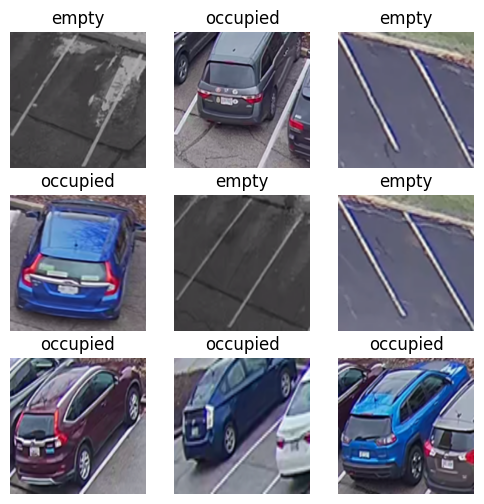

In [122]:
class_names = train_dataset.class_names

plt.figure(figsize=(6, 6))
for images, labels in train_dataset.take(1):  # Take one batch
    for i in range(9):  # Display the first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [123]:
#Building the model
#Instantiating a small convnet for dogs vs. cats classification
#*Model - 1 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers*

inputs = keras.Input(shape=(224, 224, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)


model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [124]:
# Compilimg the results of the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


# Saving the results of the model
callbacks = ModelCheckpoint(
            filepath= "model1.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Fitting/Running the Model
Model_1 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks)

Epoch 1/50
4/4 [==============================] - 3s 329ms/step - loss: 0.7382 - accuracy: 0.4286 - val_loss: 0.6904 - val_accuracy: 0.8542
Epoch 2/50
4/4 [==============================] - 0s 58ms/step - loss: 0.6916 - accuracy: 0.6633 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 57ms/step - loss: 0.6922 - accuracy: 0.5000 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 0s 73ms/step - loss: 0.6838 - accuracy: 0.5102 - val_loss: 0.6752 - val_accuracy: 0.6250
Epoch 5/50
4/4 [==============================] - 0s 74ms/step - loss: 0.6489 - accuracy: 0.6939 - val_loss: 0.5681 - val_accuracy: 0.7500
Epoch 6/50
4/4 [==============================] - 0s 72ms/step - loss: 0.4542 - accuracy: 0.7959 - val_loss: 0.4737 - val_accuracy: 0.7708
Epoch 7/50
4/4 [==============================] - 0s 55ms/step - loss: 0.3394 - accuracy: 0.8367 - val_loss: 0.4947 - val_accuracy: 0.7708
Epoch 8/50
4/4 [==========

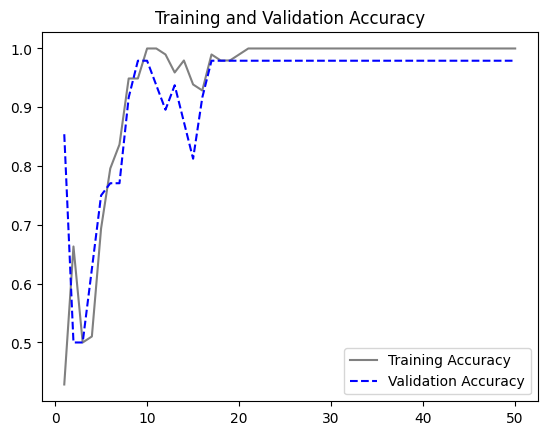

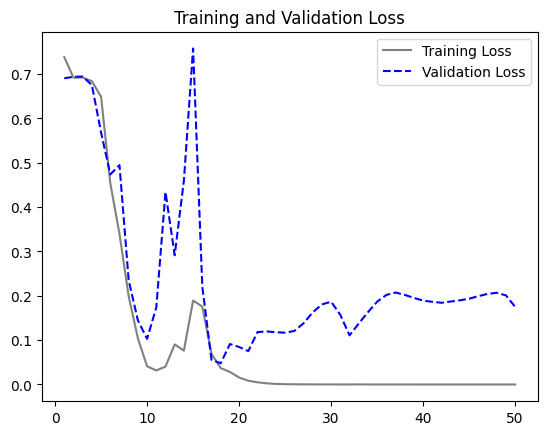

In [125]:
accuracy = Model_1.history["accuracy"]
val_accuracy = Model_1.history["val_accuracy"]

loss = Model_1.history["loss"]
val_loss = Model_1.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [126]:
test_model = keras.models.load_model("model1.keras")
Model1_Results = test_model.evaluate(test_dataset)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

2/2 [==============================] - 1s 348ms/step - loss: 0.5421 - accuracy: 0.8600
Loss: 0.542
Accuracy: 0.860


Using The data Augumentation

In [128]:
# To deprecate warnings that are making the output look clumsy
import logging
logging.getLogger('tensorflow').disabled = True

In [130]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        layers.RandomHeight(0.1),
        layers.RandomWidth(0.1),
        layers.RandomRotation(factor=0.05),
    ]
)

Looking at the augmented images

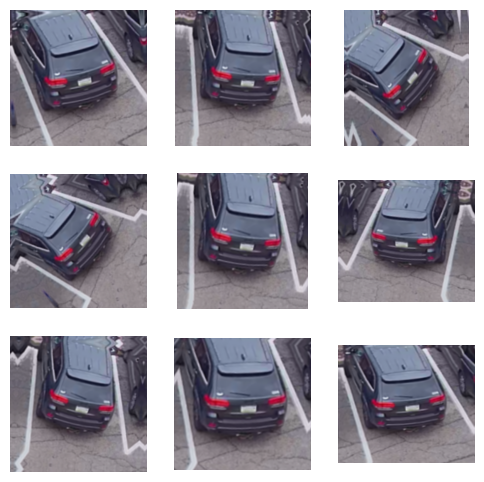

In [138]:
plt.figure(figsize=(6, 6))
for images, _ in train_dataset.take(1):
   for i in range(9):
      augmented_images = data_augmentation(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

Model - 2 MaxPooling Operation with Increase in filters from 32 to 256 in 5 Input Layers with the data being used from the Augmented Images and a droput rate of 0.5*

In [150]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)  # Add this line
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 rescaling_10 (Rescaling)    (None, None, None, 3)     0         
                                                                 
 conv2d_54 (Conv2D)          (None, None, None, 32)    896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, None, None, 64)    18496     
                                                           

In [142]:
# Compiling the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# Saving the results of the model
callbacks = ModelCheckpoint(
            filepath= "model2.keras",
            save_best_only= True,
            monitor= "val_loss")

# Fitting/Running the Model
Model_2 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks)

Epoch 1/50
4/4 [==============================] - 7s 900ms/step - loss: 0.7007 - accuracy: 0.5204 - val_loss: 0.6890 - val_accuracy: 0.6042
Epoch 2/50
4/4 [==============================] - 4s 823ms/step - loss: 0.6895 - accuracy: 0.5102 - val_loss: 0.6713 - val_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 4s 923ms/step - loss: 0.6664 - accuracy: 0.5204 - val_loss: 0.6647 - val_accuracy: 0.6667
Epoch 4/50
4/4 [==============================] - 3s 820ms/step - loss: 0.6628 - accuracy: 0.6020 - val_loss: 0.6754 - val_accuracy: 0.7292
Epoch 5/50
4/4 [==============================] - 3s 606ms/step - loss: 0.6316 - accuracy: 0.7449 - val_loss: 0.6247 - val_accuracy: 0.5208
Epoch 6/50
4/4 [==============================] - 4s 846ms/step - loss: 0.5639 - accuracy: 0.7653 - val_loss: 0.6265 - val_accuracy: 0.6875
Epoch 7/50
4/4 [==============================] - 3s 687ms/step - loss: 0.6159 - accuracy: 0.6837 - val_loss: 0.6224 - val_accuracy: 0.6875
Epoch 8/50
4/4 [====

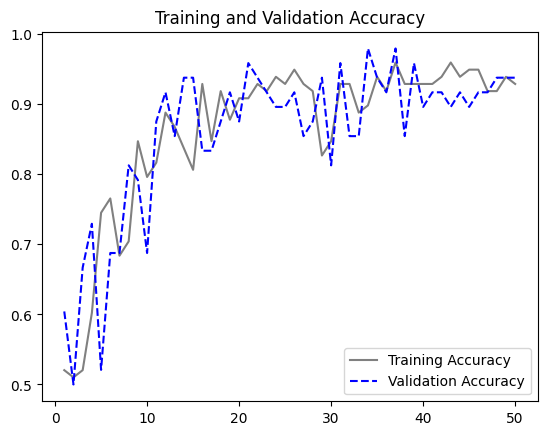

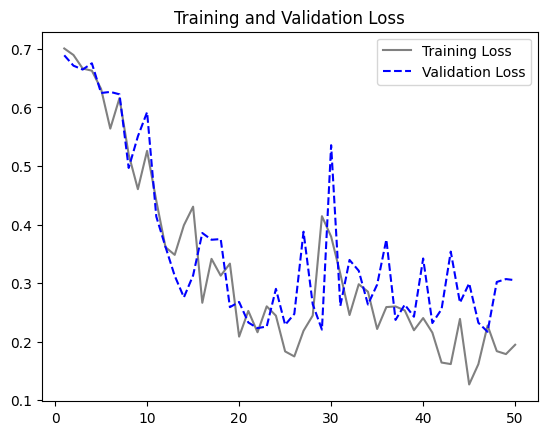

In [143]:
accuracy = Model_2.history["accuracy"]
val_accuracy = Model_2.history["val_accuracy"]

loss = Model_2.history["loss"]
val_loss = Model_2.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [145]:
test_model = keras.models.load_model("model2.keras")
Model2_Results = test_model.evaluate(test_dataset)
print(f'Loss: {Model2_Results[0]:.3f}')
print(f'Accuracy: {Model2_Results[1]:.3f}')

2/2 [==============================] - 0s 20ms/step - loss: 0.4981 - accuracy: 0.7600
Loss: 0.498
Accuracy: 0.760


Model - 3 MaxPooling Operation with Increase in filters from 32 to 512 in 6 Input Layers with the use of Augmented Images and Dropout rate of 0.5

In [153]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 rescaling_12 (Rescaling)    (None, None, None, 3)     0         
                                                                 
 conv2d_65 (Conv2D)          (None, None, None, 32)    896       
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, None, None, 32)   0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, None, None, 64)    18496     
                                                           

In [154]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ["accuracy"])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath= "model3.keras",
            save_best_only= True,
            monitor= "val_loss")


# Model Fit
Model_3 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks)

Epoch 1/50
4/4 [==============================] - 6s 684ms/step - loss: 0.7439 - accuracy: 0.5306 - val_loss: 0.7000 - val_accuracy: 0.5000
Epoch 2/50
4/4 [==============================] - 2s 506ms/step - loss: 0.6929 - accuracy: 0.5714 - val_loss: 0.6773 - val_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 2s 372ms/step - loss: 0.6810 - accuracy: 0.5000 - val_loss: 0.6561 - val_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 2s 460ms/step - loss: 0.6747 - accuracy: 0.5000 - val_loss: 0.6477 - val_accuracy: 0.5000
Epoch 5/50
4/4 [==============================] - 3s 563ms/step - loss: 0.6021 - accuracy: 0.5000 - val_loss: 0.6849 - val_accuracy: 0.5208
Epoch 6/50
4/4 [==============================] - 2s 344ms/step - loss: 0.6225 - accuracy: 0.6531 - val_loss: 0.6553 - val_accuracy: 0.8750
Epoch 7/50
4/4 [==============================] - 2s 330ms/step - loss: 0.6046 - accuracy: 0.8776 - val_loss: 0.5867 - val_accuracy: 0.7708
Epoch 8/50
4/4 [====

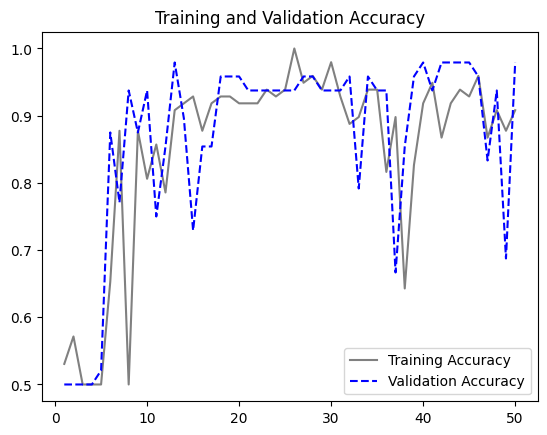

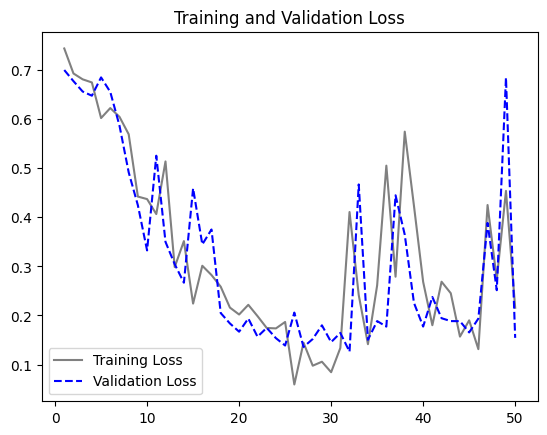

In [155]:
accuracy = Model_3.history["accuracy"]
val_accuracy = Model_3.history["val_accuracy"]

loss = Model_3.history["loss"]
val_loss = Model_3.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [156]:
best_model = keras.models.load_model("model3.keras")
Model3_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model3_Results[0]:.3f}')
print(f'Accuracy: {Model3_Results[1]:.3f}')

2/2 [==============================] - 0s 71ms/step - loss: 0.1607 - accuracy: 0.9400
Loss: 0.161
Accuracy: 0.940


Model - 4 MaxPooling Operation with Increase in filters from 64 to 1024 in 5 Input Layers with the use of Augmented Images and Dropout rate of 0.6

In [158]:
inputs = keras.Input(shape=(224,224,3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=1024, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.6)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 rescaling_14 (Rescaling)    (None, None, None, 3)     0         
                                                                 
 conv2d_76 (Conv2D)          (None, None, None, 64)    1792      
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, None, None, 64)   0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, None, None, 128)   73856     
                                                          

In [159]:
# Compiling the Model
model.compile(loss= "binary_crossentropy",
              optimizer= "adam",
              metrics= ['accuracy'])


# Monitoring the best validation loss using Callbacks
callbacks = ModelCheckpoint(
            filepath = "model4.keras",
            save_best_only= True,
            monitor= "val_loss"
            )

# Model Fit
Model_4 = model.fit(
          train_dataset,
          epochs= 50,
          validation_data= validation_dataset,
          callbacks= callbacks
          )

Epoch 1/50
4/4 [==============================] - 15s 3s/step - loss: 0.8074 - accuracy: 0.5102 - val_loss: 0.7049 - val_accuracy: 0.5000
Epoch 2/50
4/4 [==============================] - 9s 2s/step - loss: 0.6979 - accuracy: 0.5408 - val_loss: 0.6743 - val_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 10s 2s/step - loss: 0.7226 - accuracy: 0.5000 - val_loss: 0.6758 - val_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 7s 2s/step - loss: 0.6783 - accuracy: 0.5612 - val_loss: 0.6605 - val_accuracy: 0.5000
Epoch 5/50
4/4 [==============================] - 8s 2s/step - loss: 0.6334 - accuracy: 0.5000 - val_loss: 0.6230 - val_accuracy: 0.6250
Epoch 6/50
4/4 [==============================] - 7s 2s/step - loss: 0.6017 - accuracy: 0.7041 - val_loss: 0.6354 - val_accuracy: 0.8333
Epoch 7/50
4/4 [==============================] - 7s 1s/step - loss: 0.5748 - accuracy: 0.8163 - val_loss: 0.5473 - val_accuracy: 0.8125
Epoch 8/50
4/4 [=======================

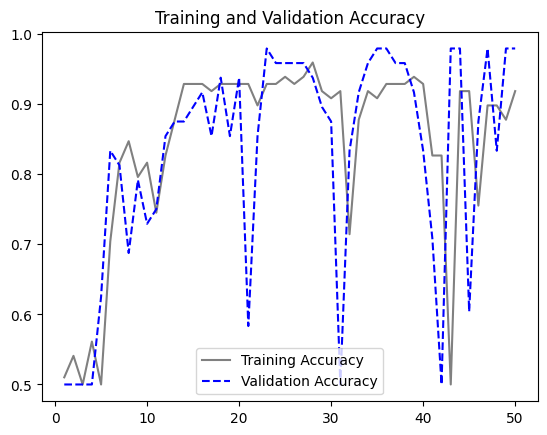

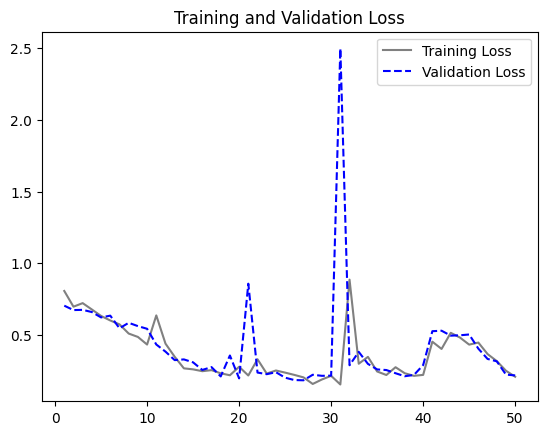

In [160]:
accuracy = Model_4.history["accuracy"]
val_accuracy = Model_4.history["val_accuracy"]

loss = Model_4.history["loss"]
val_loss = Model_4.history["val_loss"]

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, color="grey", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [161]:
best_model = keras.models.load_model("model4.keras")
Model4_Results = best_model.evaluate(test_dataset)
print(f'Loss: {Model4_Results[0]:.3f}')
print(f'Accuracy: {Model4_Results[1]:.3f}')

2/2 [==============================] - 1s 783ms/step - loss: 0.3596 - accuracy: 0.8400
Loss: 0.360
Accuracy: 0.840


Pretrained

In [177]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3))

In [178]:
# Before Freezing
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [179]:
# After Freezing
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [180]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [181]:
# Data Augmentation -Adding a data augmentation stage to provide augmented training samples and a classifier to the convolutional base
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# Adding the Classifier and Dense Network
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

In [182]:
# Compiling the Model
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Using CallBacks to monitor the best val_loss
callbacks = ModelCheckpoint(
            filepath= "vgg_model2.keras",
            save_best_only= True,
            monitor= "val_loss")

# Model Fit
VGG_Model_2 = model.fit(
              train_dataset,
              epochs= 50,
              validation_data=validation_dataset,
              callbacks=callbacks)

Epoch 1/50
4/4 [==============================] - 3s 317ms/step - loss: 11.9353 - accuracy: 0.7857 - val_loss: 5.0504 - val_accuracy: 0.9792
Epoch 2/50
4/4 [==============================] - 1s 164ms/step - loss: 12.9250 - accuracy: 0.9286 - val_loss: 10.9618 - val_accuracy: 0.9792
Epoch 3/50
4/4 [==============================] - 1s 244ms/step - loss: 24.6470 - accuracy: 0.9286 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 1s 164ms/step - loss: 6.6576 - accuracy: 0.9592 - val_loss: 1.7164 - val_accuracy: 0.9792
Epoch 5/50
4/4 [==============================] - 1s 165ms/step - loss: 4.7015 - accuracy: 0.9898 - val_loss: 1.8252e-36 - val_accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 1s 164ms/step - loss: 4.3354 - accuracy: 0.9796 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 1s 164ms/step - loss: 2.4582 - accuracy: 0.9898 - val_loss: 7.0341e-18 - val_accuracy: 1.0000


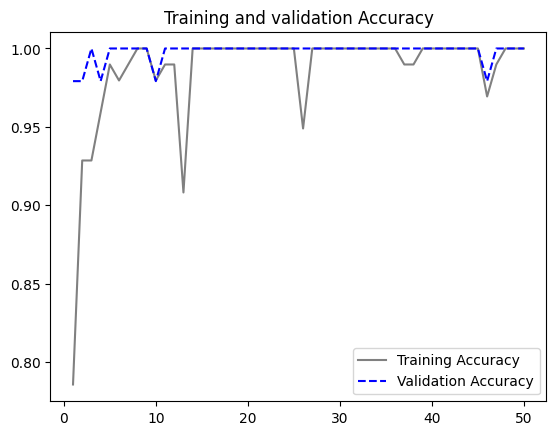

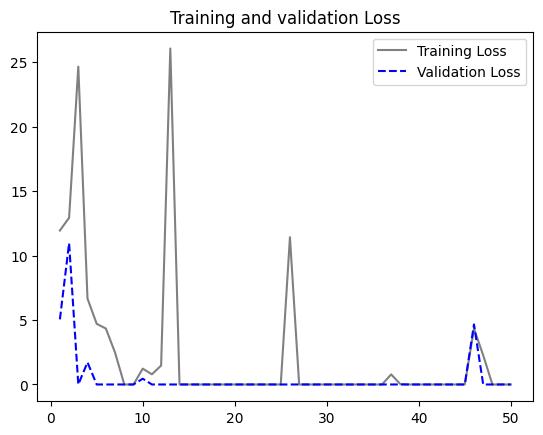

In [183]:
acc = VGG_Model_2.history["accuracy"]
val_acc = VGG_Model_2.history["val_accuracy"]

loss = VGG_Model_2.history["loss"]
val_loss = VGG_Model_2.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

In [184]:
best_model = keras.models.load_model("vgg_model2.keras")
VGG_Model_2_Results= best_model.evaluate(test_dataset)
print(f'Loss: {VGG_Model_2_Results[0]:.3f}')
print(f'Accuracy: {VGG_Model_2_Results[1]:.3f}')

2/2 [==============================] - 0s 105ms/step - loss: 2.0705e-34 - accuracy: 1.0000
Loss: 0.000
Accuracy: 1.000


In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])


callbacks = ModelCheckpoint(
            filepath="fine_tuning_vgg_model2.keras",
            save_best_only=True,
            monitor="val_loss")


FineTuned_VGG_Model_2 = model.fit(
                        train_dataset,
                        epochs=30,
                        validation_data=validation_dataset,
                        callbacks=callbacks)

In [ ]:
acc = FineTuned_VGG_Model_2.history["accuracy"]
val_acc = FineTuned_VGG_Model_2.history["val_accuracy"]

loss = FineTuned_VGG_Model_2.history["loss"]
val_loss = FineTuned_VGG_Model_2.history["val_loss"]

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, color="grey", label="Training Accuracy")
plt.plot(epochs, val_acc, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, color="grey", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Training and validation Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model("fine_tuning_vgg_model2.keras")
FineTuned_VGG_Model_2_Results = best_model.evaluate(test_dataset)
print(f"Loss: {FineTuned_VGG_Model_2_Results[0]:.3f}")
print(f"Accuracy: {FineTuned_VGG_Model_2_Results[1]:.3f}")